In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [152]:
train=pd.read_csv("F:\\Analytics Vidhya\\Loan Prediction\\Data\\train.csv")
test=pd.read_csv("F:\\Analytics Vidhya\\Loan Prediction\\Data\\test.csv")

In [153]:
train_original=train.copy()
test_original=test.copy()

In [154]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [155]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [156]:
train.shape

(614, 13)

## Univariate Analysis

In [157]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

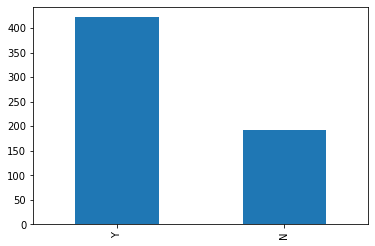

In [158]:
train['Loan_Status'].value_counts().plot.bar()

In [159]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:title={'center':'Credit_History'}>

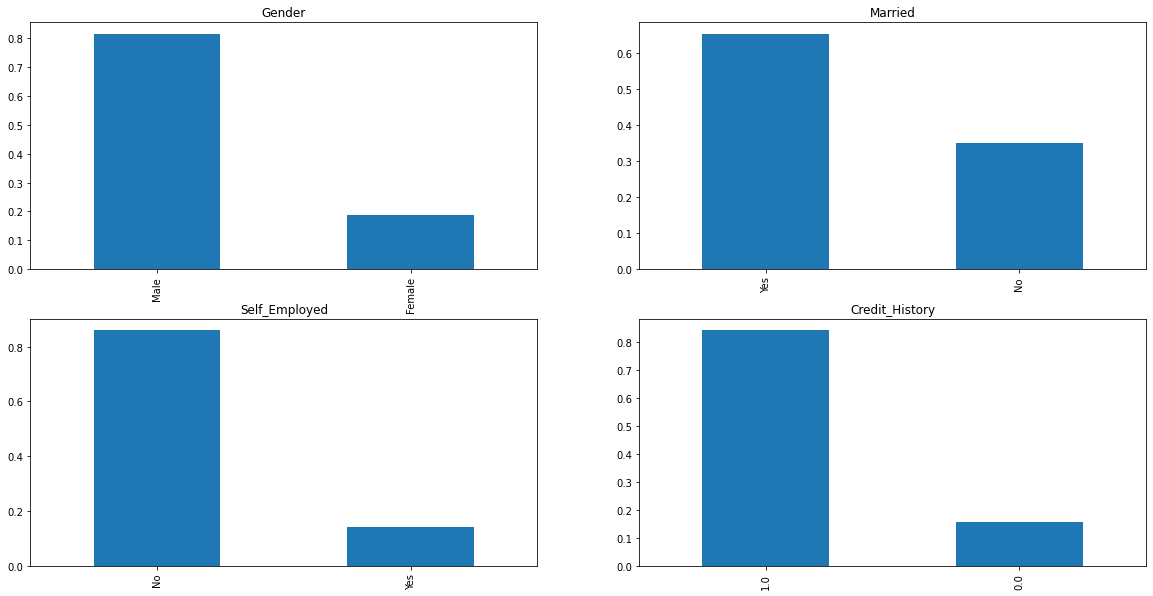

In [160]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender', )
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

<AxesSubplot:title={'center':'Property_Area'}>

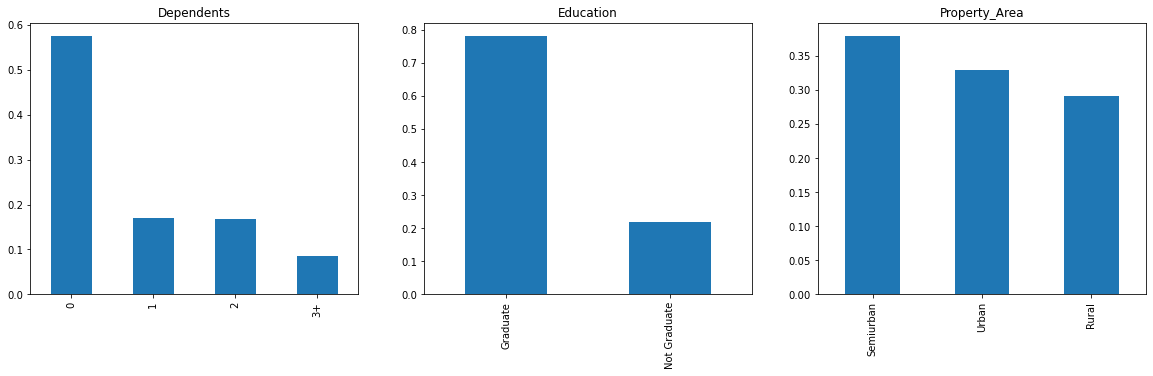

In [161]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,5),title='Dependents', )
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')


<AxesSubplot:>

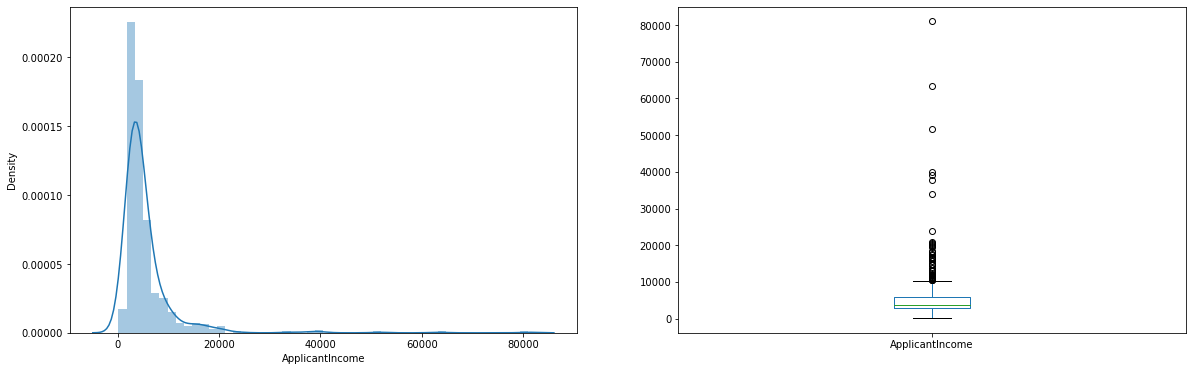

In [162]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(20,6))

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

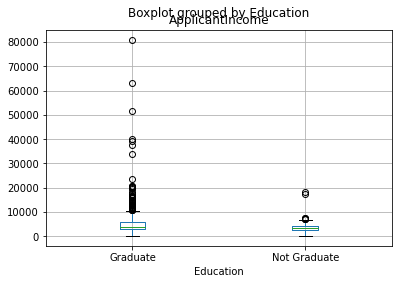

In [163]:
train.boxplot(column='ApplicantIncome',by='Education')


<AxesSubplot:>

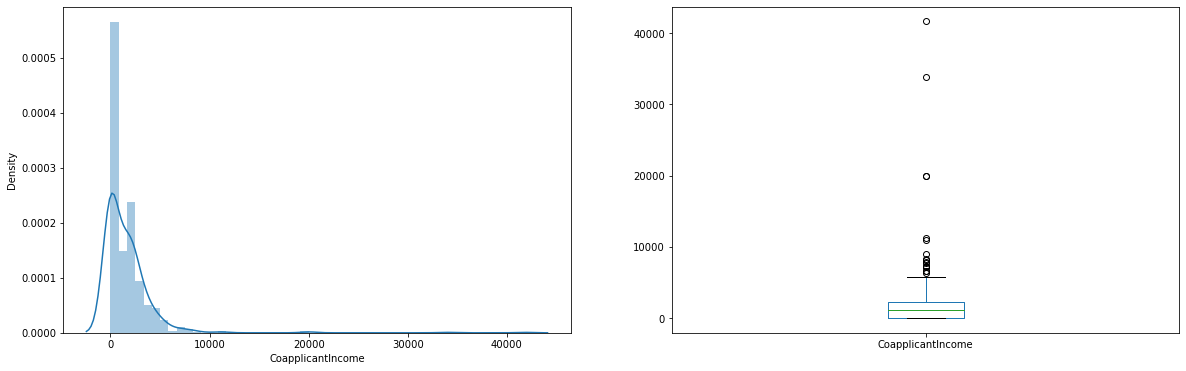

In [164]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(20,6))

<AxesSubplot:>

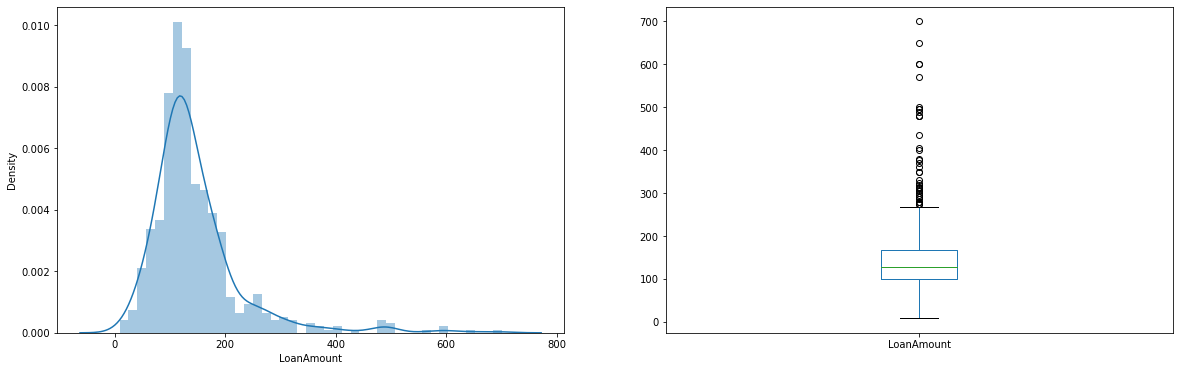

In [165]:
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(20,6))

## Bivariate Analysis

### Catergorical vs Target Variable

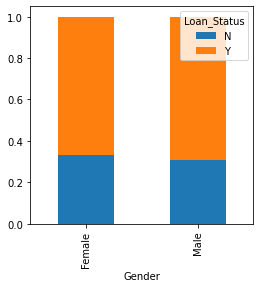

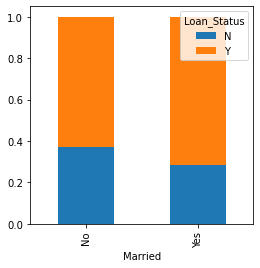

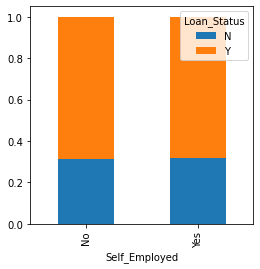

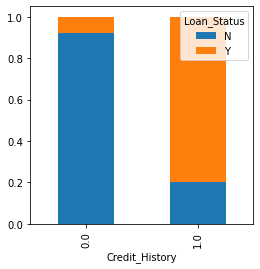

In [166]:


Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(4,4))
plt.show()

Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(4,4))
plt.show()

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(4,4))
plt.show()

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(4,4))
plt.show()


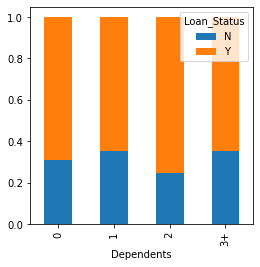

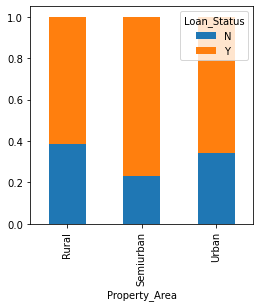

In [167]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(4,4))
plt.show()

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(4,4))
plt.show()


### Numerical vs Target Variable

<AxesSubplot:xlabel='Loan_Status'>

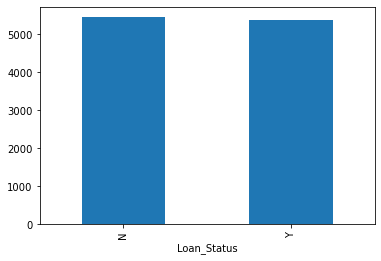

In [168]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar() 


Creating Bins

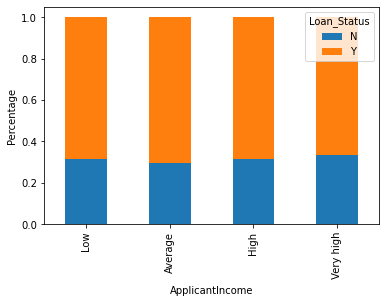

In [169]:
bins= [0,2500,4000,6000,81000] 
group= ['Low','Average','High',' Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin= pd.crosstab(train['Income_bin'],train ['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True )
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage') 


In [170]:
train = train.drop(['Income_bin'],axis=1)  

In [171]:


train['Dependents'].replace('3+', 3, inplace = True)
test['Dependents'].replace('3+', 3, inplace = True) 

train['Loan_Status'].replace( 'N', 0, inplace= True)
train['Loan_Status'].replace( 'Y', 1, inplace= True) 



### Correlation Heat Map

<AxesSubplot:>

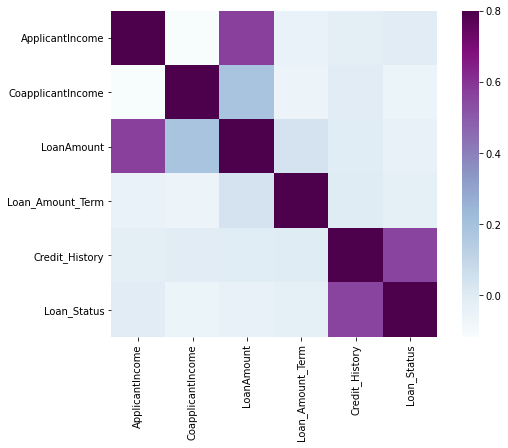

In [172]:

matrix= train.corr()
f,ax= plt.subplots(figsize= (9,6))
sns.heatmap(matrix, vmax=.8, square= True , cmap ='BuPu')

# Missing Values

In [173]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Categorical Variables (Mode)

In [174]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [175]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

### Numeric Variables (Mean/Median)

In [176]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [177]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [178]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [179]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [180]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [181]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Outliers

*For right skewed LoanAmount*

<AxesSubplot:>

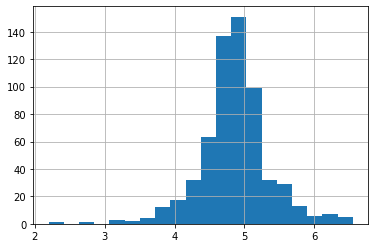

In [182]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)


In [183]:
test['LoanAmount_log']=np.log(test['LoanAmount'])

# Model 

In [184]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [185]:
x=train.drop('Loan_Status',1)
y=train.Loan_Status

In [186]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [187]:
from sklearn.model_selection import train_test_split
x_train, x_cv,y_train,y_cv=train_test_split(x,y,test_size=0.3)

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [189]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [190]:
pred_cv=model.predict(x_cv)

In [191]:
accuracy_score(y_cv,pred_cv)

0.8054054054054054

In [192]:
pred_test=model.predict(test)


In [193]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [194]:
pred_cv=model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8054054054054054

In [195]:
submission=pd.read_csv('F:\\Analytics Vidhya\\Loan Prediction\\Data\\sample_submission.csv')

In [196]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [197]:
submission['Loan_Status']=pred_test

In [198]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [199]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [200]:
submission.head(20)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [203]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('F:\\Analytics Vidhya\\Loan Prediction\\Data\\Final.csv')

In [205]:
final=pd.read_csv('F:\\Analytics Vidhya\\Loan Prediction\\Data\\Final.csv')

In [208]:
final.head()

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y
